In [1]:
# importing the libraries and packages
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
# Loading the dataset
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# renaming the columns
data=data.rename({'YearsExperience':'yrs_exp','Salary':'salary'},axis=1)
print(data.head(5))

   yrs_exp   salary
0      1.1  39343.0
1      1.3  46205.0
2      1.5  37731.0
3      2.0  43525.0
4      2.2  39891.0


In [5]:
# checking the missing values--
data.isnull().sum()

yrs_exp    0
salary     0
dtype: int64

In [6]:
# printing the basic info about data--
print(data.columns)
print("Data types---")
print("==========================")
print(data.dtypes)
print("==========================")
print("Info---")
print(data.info())
print("==========================")
print("Average salary---")
print(int(data["salary"].mean()))
print("Minimum salary---")
print(int(data["salary"].min()))
print("Maximum salary---")
print(int(data["salary"].max()))


Index(['yrs_exp', 'salary'], dtype='object')
Data types---
yrs_exp    float64
salary     float64
dtype: object
Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   yrs_exp  30 non-null     float64
 1   salary   30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None
Average salary---
76003
Minimum salary---
37731
Maximum salary---
122391


In [7]:
data["salary"]=data["salary"].astype("int")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   yrs_exp  30 non-null     float64
 1   salary   30 non-null     int32  
dtypes: float64(1), int32(1)
memory usage: 488.0 bytes


# Exploratory Data Analysis

AxesSubplot(0.125,0.125;0.775x0.755)


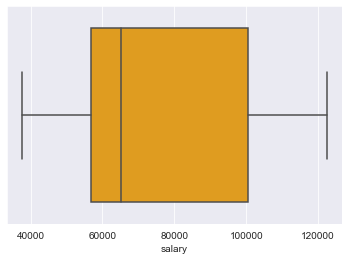

In [8]:
# checking the outliers
print(sns.boxplot(x=data["salary"],color="orange"))

AxesSubplot(0.125,0.125;0.775x0.755)


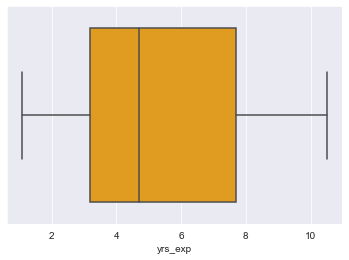

In [9]:
print(sns.boxplot(x=data["yrs_exp"],color="orange"))

0.35411967922959153


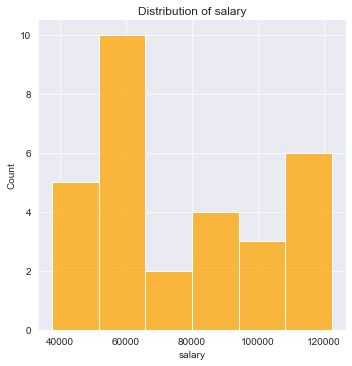

In [10]:
# distribution of salary--
sns.displot(x=data["salary"],color="orange")
plt.title("Distribution of salary")
print(data["salary"].skew())

<AxesSubplot:xlabel='yrs_exp', ylabel='salary'>

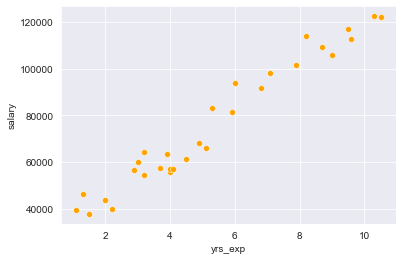

In [11]:
sns.scatterplot(x="yrs_exp",y="salary",data=data,color="orange")

<AxesSubplot:xlabel='yrs_exp', ylabel='salary'>

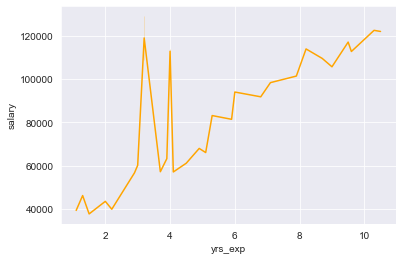

In [12]:
sns.lineplot(x="yrs_exp",y="salary",data=data,estimator="sum",color="orange")

<AxesSubplot:xlabel='yrs_exp', ylabel='salary'>

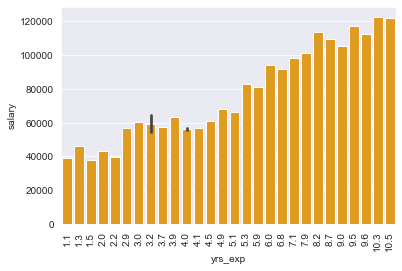

In [13]:
plt.xticks(rotation=90,fontsize="medium")
sns.barplot(x="yrs_exp",y="salary",data=data,color="orange")

<AxesSubplot:xlabel='yrs_exp', ylabel='salary'>

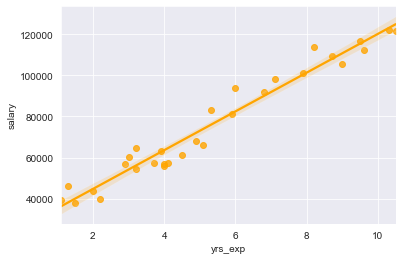

In [14]:
sns.regplot(x="yrs_exp",y="salary",data=data,color="orange")

<AxesSubplot:>

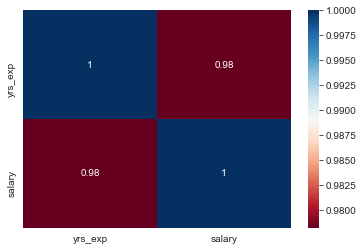

In [15]:
sns.heatmap(data.corr(),annot=True,cmap="RdBu")

# Linear Regression

### Prediction Model of Salary Hike

In [16]:
# creating the dataframe
df=data
print(df.head())

   yrs_exp  salary
0      1.1   39343
1      1.3   46205
2      1.5   37731
3      2.0   43525
4      2.2   39891


In [17]:
df.shape

(30, 2)

In [18]:
# train test split
training,testing=train_test_split(df,test_size=0.2)

In [19]:
print(training.head())
training.shape

    yrs_exp  salary
2       1.5   37731
17      5.3   83088
14      4.5   61111
0       1.1   39343
12      4.0   56957


(24, 2)

In [20]:
print(testing.head())
testing.shape

    yrs_exp  salary
10      3.9   63218
22      7.9  101302
26      9.5  116969
8       3.2   64445
9       3.7   57189


(6, 2)

In [21]:
# defining
X=training["yrs_exp"]
y=training["salary"]
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [22]:
model=LinearRegression()
print(model)

LinearRegression()


In [23]:
train_model=model.fit(X,y)
print("Model training is completed")
print(train_model)

Model training is completed
LinearRegression()


In [24]:
print(model.coef_)         
print(model.intercept_)

[[9428.31675033]]
[25897.7892097]


In [25]:
x=2.0
y=round((model.coef_[0][0])*x + model.intercept_[0])
print("Salary with {} yrs of experience is {}.".format(x,y))

Salary with 2.0 yrs of experience is 44754.


In [26]:
X_test=testing["yrs_exp"].values.reshape(-1,1)
X_test

array([[3.9],
       [7.9],
       [9.5],
       [3.2],
       [3.7],
       [4.1]])

In [27]:
pred_salary=train_model.predict(X_test)
pred_salary


array([[ 62668.22453599],
       [100381.49153732],
       [115466.79833786],
       [ 56068.40281076],
       [ 60782.56118593],
       [ 64553.88788606]])

In [28]:
testing["pred_salary"]=pred_salary
testing

<ipython-input-28-dfa7f741c9bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing["pred_salary"]=pred_salary


,yrs_exp,salary,pred_salary
10,3.9,63218,62668.224536
22,7.9,101302,100381.491537
26,9.5,116969,115466.798338
8,3.2,64445,56068.402811
9,3.7,57189,60782.561186
13,4.1,57081,64553.887886


In [29]:
testing["error"]=testing["salary"]-testing["pred_salary"]
testing

<ipython-input-29-a86e709dac24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing["error"]=testing["salary"]-testing["pred_salary"]


,yrs_exp,salary,pred_salary,error
10,3.9,63218,62668.224536,549.775464
22,7.9,101302,100381.491537,920.508463
26,9.5,116969,115466.798338,1502.201662
8,3.2,64445,56068.402811,8376.597189
9,3.7,57189,60782.561186,-3593.561186
13,4.1,57081,64553.887886,-7472.887886


In [30]:
r2_score(testing["salary"],testing["pred_salary"])

0.957185662754508

<AxesSubplot:xlabel='yrs_exp', ylabel='salary'>

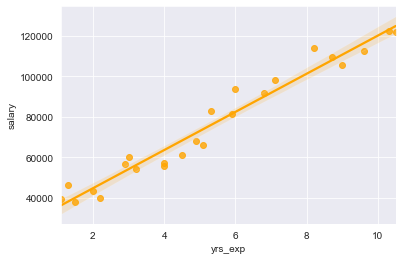

In [31]:
sns.regplot(x="yrs_exp",y="salary",data=training,color="orange")

<AxesSubplot:xlabel='yrs_exp', ylabel='pred_salary'>

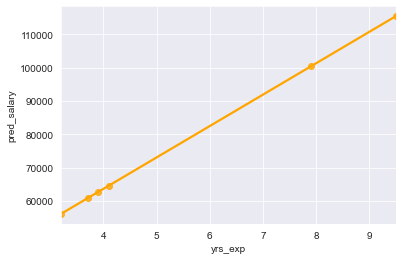

In [32]:
sns.regplot(x="yrs_exp",y="pred_salary",data=testing,color="orange")